### Netflix Stock Price Prediction
#### Reference of Dataset  https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction/data

#### importing  the necessary libraries..

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r'C:\Users\RAMYASRI\Downloads\NFLX.csv')# Load the Dataset

### Data Exploration

In [4]:
df.head()

Date        Open        High         Low       Close   Adj Close   
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995  \
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900

In [5]:
df.tail()

Date        Open        High         Low       Close   Adj Close   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015  \
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
1004  20047500  
1005  22542300  
1006  14346000  
1007   9905200  
1008   7782400

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df.describe()

Open         High          Low        Close    Adj Close   
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000  \
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
df.corr()

Date      Open      High       Low     Close  Adj Close   
Date       1.000000  0.840554  0.841665  0.840878  0.841384   0.841384  \
Open       0.840554  1.000000  0.998605  0.998508  0.996812   0.996812   
High       0.841665  0.998605  1.000000  0.998203  0.998551   0.998551   
Low        0.840878  0.998508  0.998203  1.000000  0.998544   0.998544   
Close      0.841384  0.996812  0.998551  0.998544  1.000000   1.000000   
Adj Close  0.841384  0.996812  0.998551  0.998544  1.000000   1.000000   
Volume    -0.427661 -0.415838 -0.400699 -0.432116 -0.413362  -0.413362   

             Volume  
Date      -0.427661  
Open      -0.415838  
High      -0.400699  
Low       -0.432116  
Close     -0.413362  
Adj Close -0.413362  
Volume     1.000000

In [11]:
df['year'] = pd.DatetimeIndex(df['Date']).year

### Data Visualization

<Axes: >

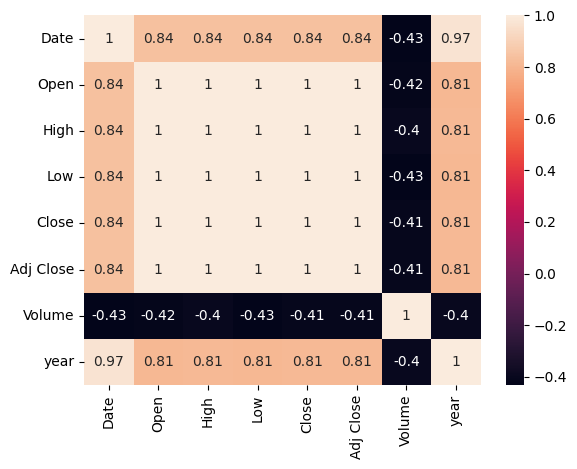

In [13]:
sns.heatmap(df.corr(),annot=True)

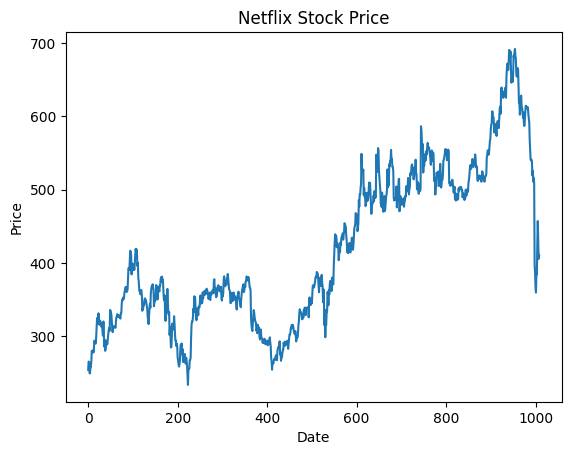

In [14]:
plt.plot(df['Close'])
plt.title('Netflix Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Text(0, 0.5, 'Volume')

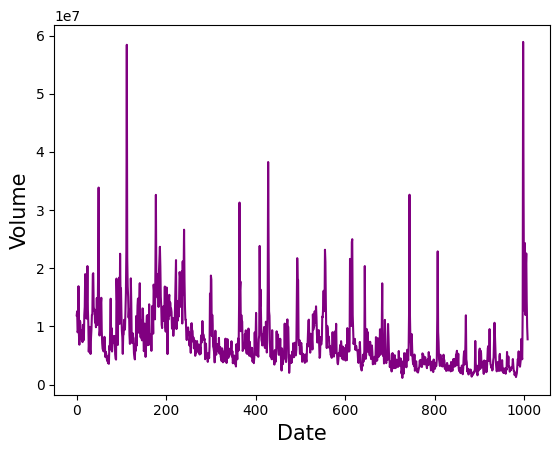

In [16]:
plt.plot(df['Volume'], color='purple')
plt.xlabel("Date", fontsize=15)
plt.ylabel("Volume", fontsize=15)

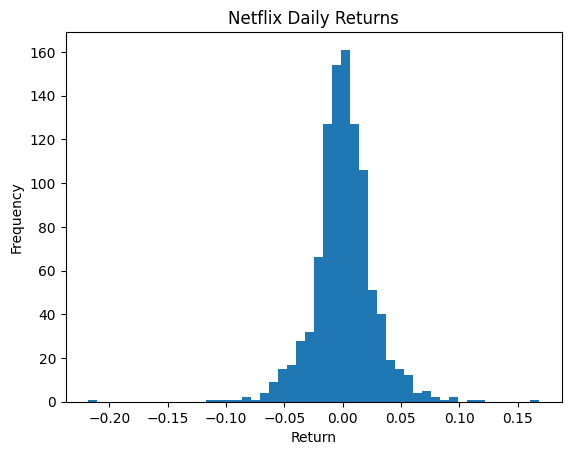

In [17]:
plt.hist(df['Close'].pct_change(), bins=50)
plt.title('Netflix Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

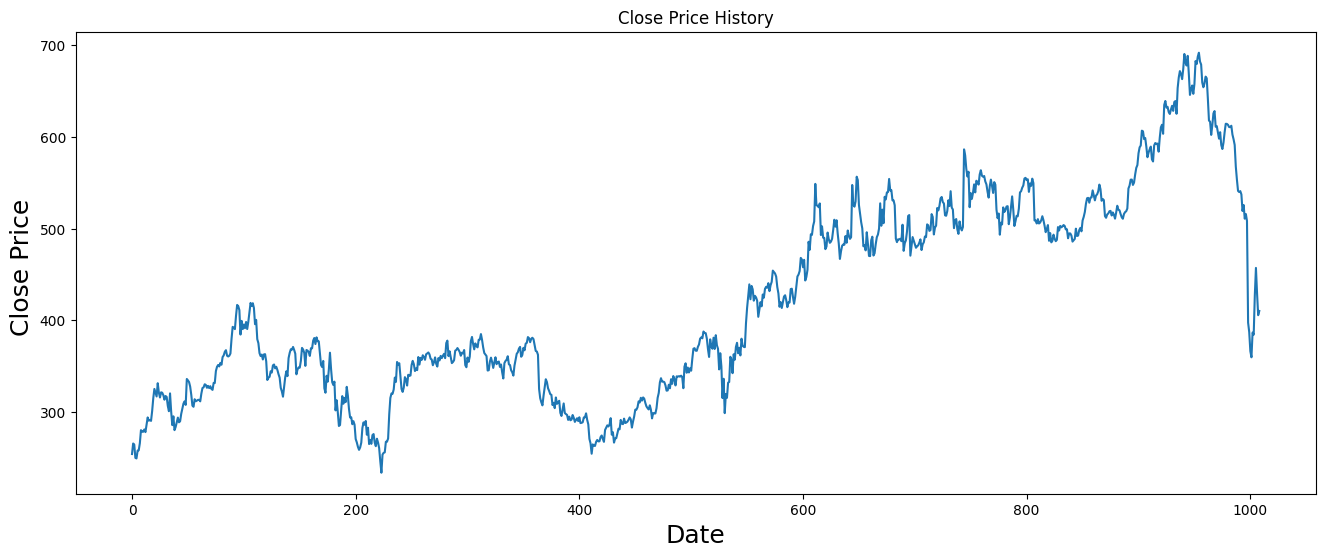

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

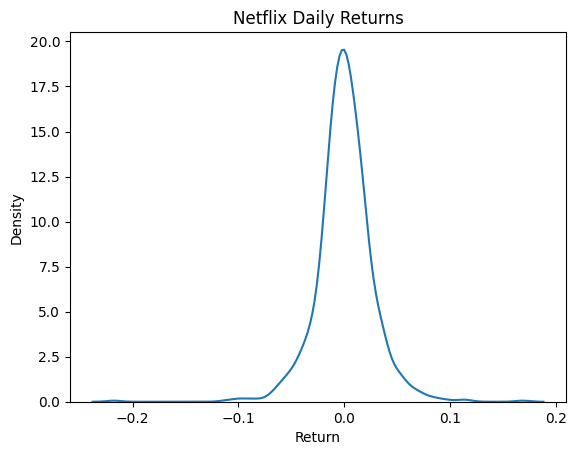

In [19]:
sns.kdeplot(df['Close'].pct_change())
plt.title('Netflix Daily Returns')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()

In [20]:
df.drop('year',axis=1,inplace=True)
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

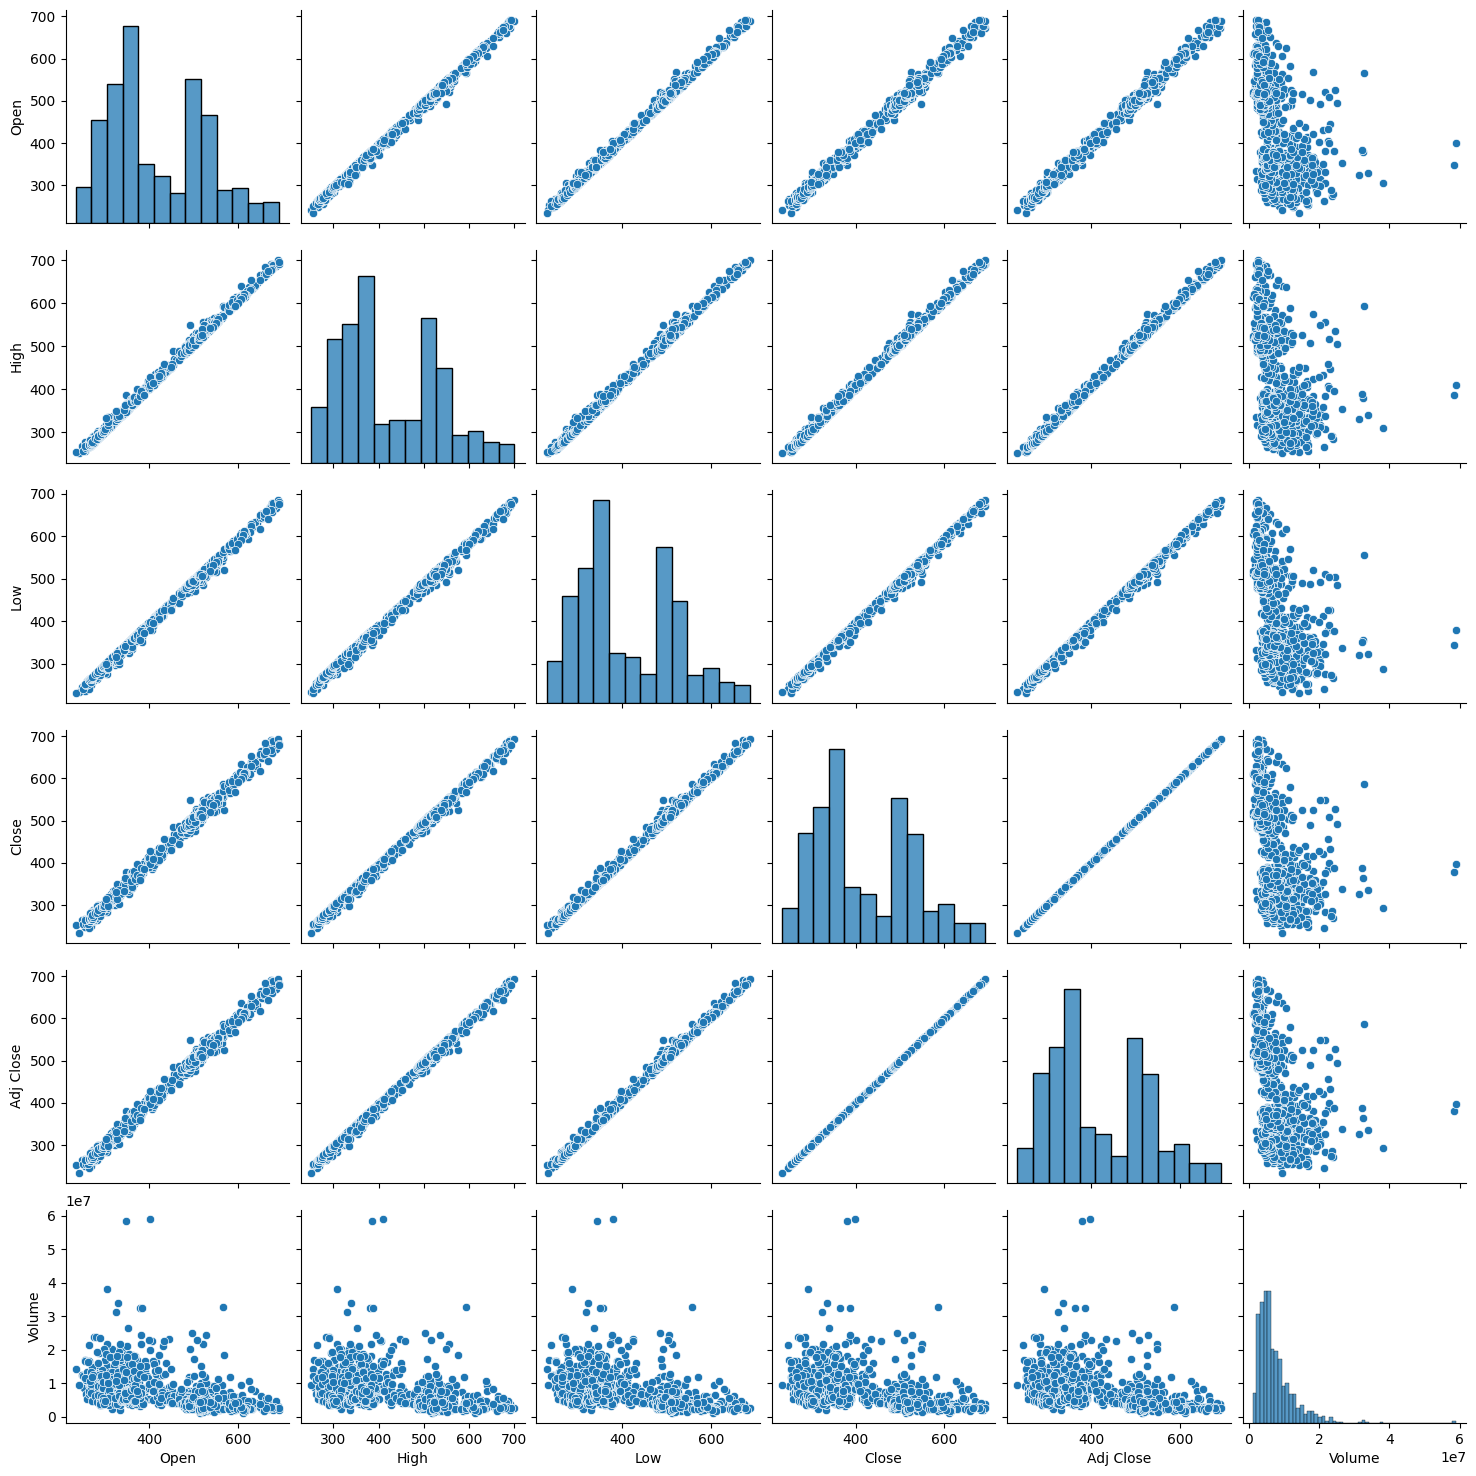

In [21]:
sns.pairplot(df)

<Axes: xlabel='Adj Close', ylabel='Open'>

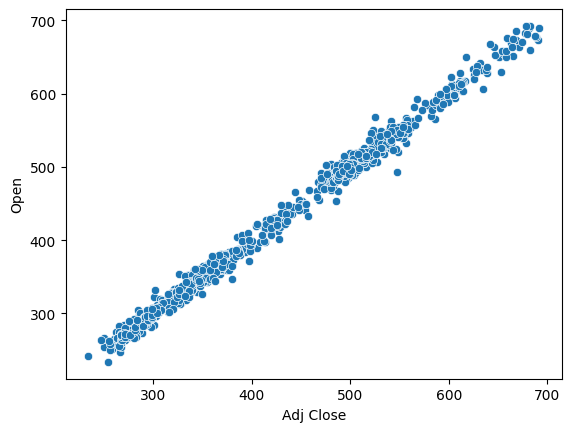

In [22]:
sns.scatterplot(df,x='Adj Close',y='Open')

In [23]:
fig = px.scatter(
    df, x='Open', y='Adj Close', opacity=0.65,
    trendline='ols', trendline_color_override='Red'
)
fig.show()

### Feature Selection And Model selection

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=df.drop(['Close','Date'],axis=1)
y=df['Close']
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,train_size=.75)

In [51]:
def correlation(data,threshold):
    cor=set()
    cor_relation=data.corr()
    for i in range(len(cor_relation)):
        for j in range(i):
            if abs(cor_relation.iloc[i,j])>threshold:
                col=cor_relation.columns[i]
                cor.add(col)
    return cor

In [52]:
corr=correlation(X_train,0.8)
len(set(corr))
corr

{'Adj Close', 'High', 'Low'}

### Prediction using  Linear Regression

In [53]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
r2 = r2_score(y_test, pred)
r2

1.0

In [55]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,pred)

1.0447505838053647e-13

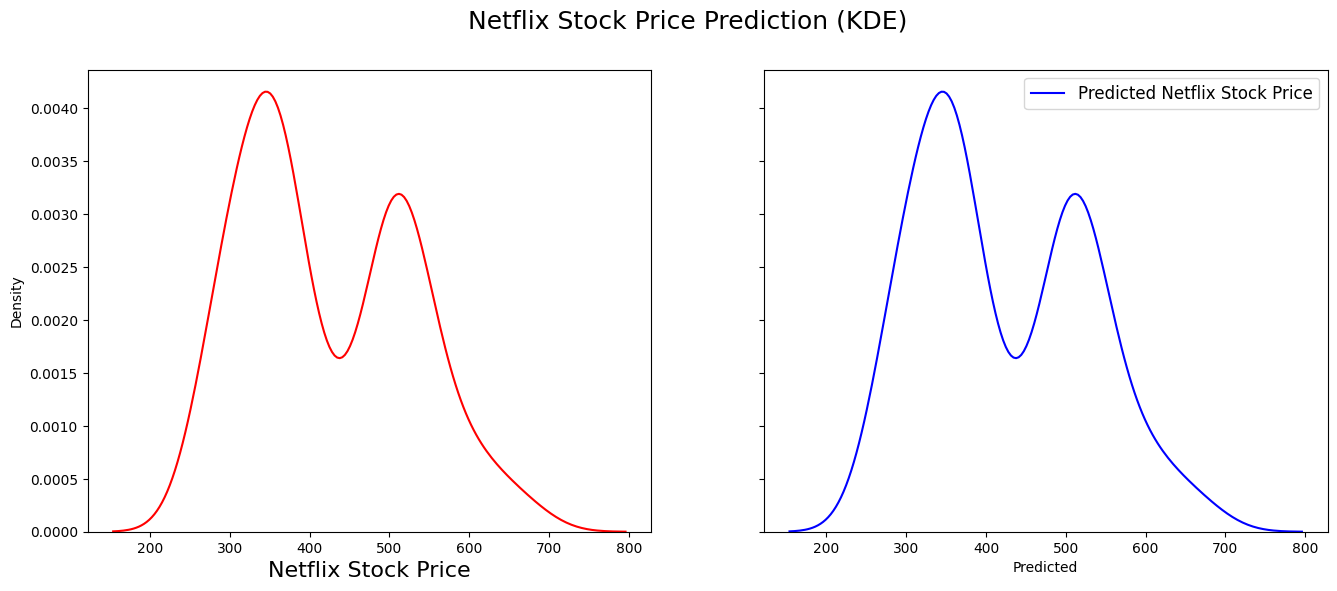

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

# Create a KDE plot for the actual and predicted values in the same plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Netflix Stock Price Prediction (KDE)', fontsize=18)

ax[0].set_xlabel('Netflix Stock Price', fontsize=16)

sns.kdeplot(data=results, x='Actual', label='Actual Netflix Stock Price', color='red', ax=ax[0])
sns.kdeplot(data=results, x='Predicted', label='Predicted Netflix Stock Price', color='blue', ax=ax[1])

plt.legend(fontsize=12)
plt.show()


In [81]:
import plotly.express as px
import pandas as pd

# Create a DataFrame with actual and predicted prices
results = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

# Create a KDE plot with Plotly Express
fig = px.histogram(results, x='Actual', histnorm='probability density', labels={'Actual': 'Actual Stock Price'}, color_discrete_sequence=['blue'])
fig.add_trace(px.histogram(results, x='Predicted', histnorm='probability density', labels={'Predicted': 'Predicted Stock Price'}, color_discrete_sequence=['red'], nbins=50).data[0])

# Customize the plot
fig.update_layout(
    title='Actual Price vs Predicted Stock Prices',
    xaxis_title='Price',
    yaxis_title='Density',
    legend_title='Distribution'
)

# Show the plot
fig.show()


In [33]:
accuracy = lr.score(X_test,y_test)
print( 'Linear Regression Accuracy: ', accuracy*100,'%')

Linear Regression Accuracy:  100.0 %


## Prediction using LSTM

In [36]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

959

In [37]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

### Time step

In [38]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

### Performing LSTM 

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

899/899 [==============================] - 45s 41ms/step - loss: 0.0043


In [40]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 2s 50ms/step


43.21602777711794

### Predictions of LSTM

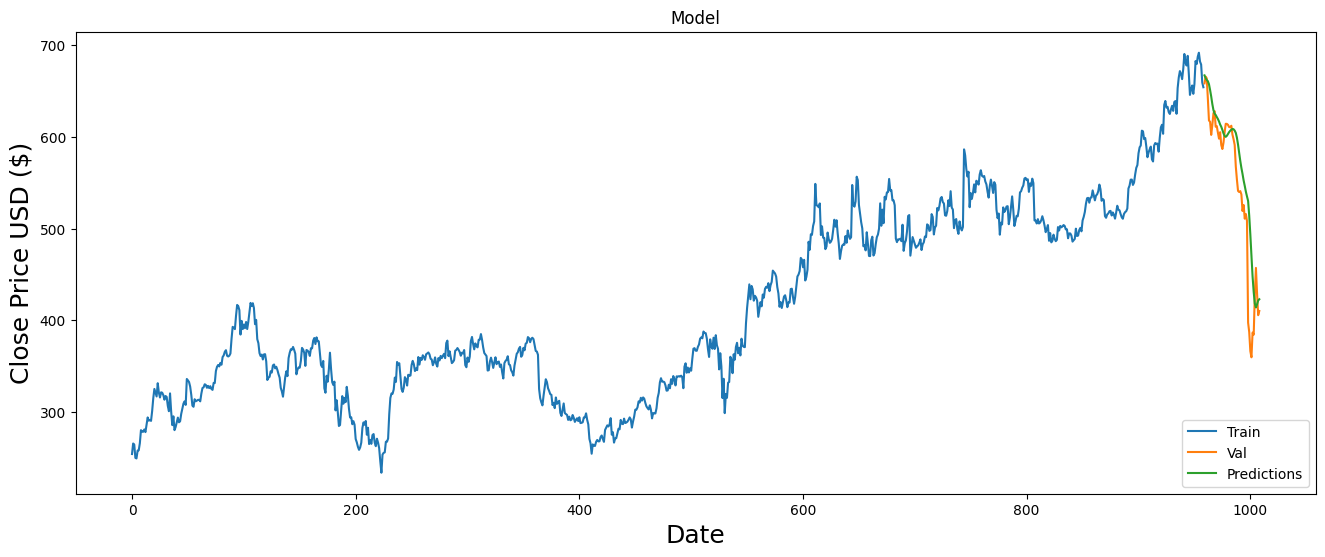

In [41]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()